In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [4]:
diabetes_data=pd.read_csv('/Users/maksimtrebusinin/Downloads/diabetes_prediction_dataset.csv')

In [5]:
diabetes_data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [10]:
diabetes_data['smoking_history']=diabetes_data['smoking_history'].map({'never':0,'current':1,
                                                                      'former':2,'ever':3,'not current':4})
diabetes_data['gender']=diabetes_data['gender'].map({'Female':1,'Male':0})

In [16]:
diabetes_data['smoking_history']=diabetes_data['smoking_history'].fillna(1)

In [17]:
diabetes_data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1.0,80.0,0,1,0.0,25.19,6.6,140,0
1,1.0,54.0,0,0,1.0,27.32,6.6,80,0
2,0.0,28.0,0,0,0.0,27.32,5.7,158,0
3,1.0,36.0,0,0,1.0,23.45,5.0,155,0
4,0.0,76.0,1,1,1.0,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,1.0,80.0,0,0,1.0,27.32,6.2,90,0
99996,1.0,2.0,0,0,1.0,17.37,6.5,100,0
99997,0.0,66.0,0,0,2.0,27.83,5.7,155,0
99998,1.0,24.0,0,0,0.0,35.42,4.0,100,0


In [18]:
X=diabetes_data.drop('diabetes',axis=1)
y=diabetes_data['diabetes']

In [67]:
X['gender']=X['gender'].fillna(X['gender'].mean())

In [20]:
scale=MinMaxScaler()
scale.fit(X)

MinMaxScaler()

In [21]:
X_transform=pd.DataFrame(scale.transform(X), columns=X.columns)

In [46]:
X_transform['gender']=X_transform['gender'].fillna(X_transform['gender'].mean())

In [47]:
X_transform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  float64
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  float64
 3   heart_disease        100000 non-null  float64
 4   smoking_history      100000 non-null  float64
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  float64
dtypes: float64(8)
memory usage: 6.1 MB


In [48]:
X_train, X_test, y_train, y_test=train_test_split(X_transform,y,test_size=0.25, random_state=0)

In [50]:
clf_knn=KNeighborsClassifier()
parametrs_knn={'n_neighbors':[1,3,5,7,9,11], 'metric':['euclidean','manhattan','chebyshev']}
grid_clf_knn=GridSearchCV(clf_knn, parametrs_knn, cv=6, n_jobs=-1)
grid_clf_knn.fit(X_train, y_train)

GridSearchCV(cv=6, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11]})

In [51]:
best_model_knn=grid_clf_knn.best_estimator_
y_pred_knn=best_model_knn.predict(X_test)

In [52]:
print(f'Accuracy_score: {accuracy_score(y_test,y_pred_knn)}')
print(f'Precision_score: {precision_score(y_test,y_pred_knn)}')
print(f'Recall_score: {recall_score(y_test,y_pred_knn)}')
print(f'f1_score: {f1_score(y_test,y_pred_knn)}')

Accuracy_score: 0.96352
Precision_score: 0.9197748064743139
Recall_score: 0.6209026128266033
f1_score: 0.7413499716392513


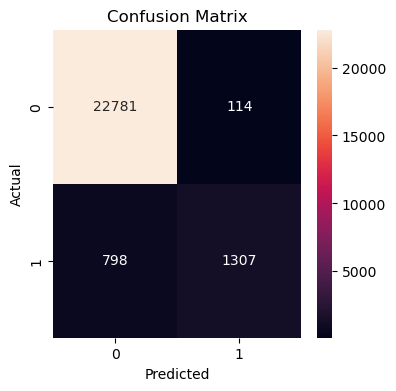

In [56]:
cf_matrix = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(4, 4))
b = sns.heatmap(cf_matrix, annot=True, fmt='g')
b.set(title='Confusion Matrix')
b.set(xlabel='Predicted', ylabel='Actual')
plt.show()

In [60]:
clf_rnf=RandomForestClassifier()
parametrs_rnf={'n_estimators':[3,5,7,10], 'max_depth':[2,3,4,5,6]}
grid_forest=GridSearchCV(clf_rnf, parametrs_rnf, cv=6, n_jobs=-1)
grid_forest.fit(X_train,y_train)

GridSearchCV(cv=6, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'n_estimators': [3, 5, 7, 10]})

In [62]:
best_model_rnf=grid_forest.best_estimator_
y_pred_rnf=best_model_rnf.predict(X_test)

In [63]:
print(f'Accuracy_score: {accuracy_score(y_test,y_pred_rnf)}')
print(f'Precision_score: {precision_score(y_test,y_pred_rnf)}')
print(f'Recall_score: {recall_score(y_test,y_pred_rnf)}')
print(f'f1_score: {f1_score(y_test,y_pred_rnf)}')

Accuracy_score: 0.972
Precision_score: 1.0
Recall_score: 0.667458432304038
f1_score: 0.8005698005698005


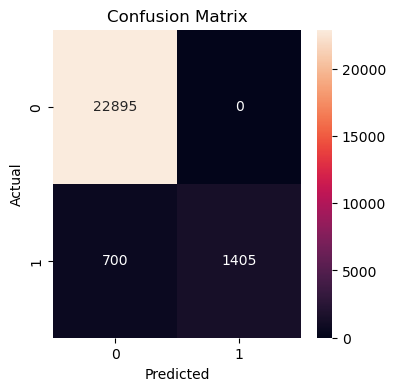

In [64]:
cf_matrix = confusion_matrix(y_test, y_pred_rnf)

plt.figure(figsize=(4, 4))
b = sns.heatmap(cf_matrix, annot=True, fmt='g')
b.set(title='Confusion Matrix')
b.set(xlabel='Predicted', ylabel='Actual')
plt.show()

In [69]:
X_train_nn, X_test_nn, y_train_nn,y_test_nn=train_test_split(X,y, test_size=0.25,random_state=0)

In [70]:
clf_rnf_with_no_norm=RandomForestClassifier()
parametrs_rnf={'n_estimators':[3,5,7,10], 'max_depth':[2,3,4,5,6]}
grid_forest_no_norm=GridSearchCV(clf_rnf_with_no_norm, parametrs_rnf, cv=6, n_jobs=-1)
grid_forest_no_norm.fit(X_train_nn,y_train_nn)

GridSearchCV(cv=6, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'n_estimators': [3, 5, 7, 10]})

In [72]:
best_model_rnf_nn=grid_forest_no_norm.best_estimator_
y_pred_rnf_nn=best_model_rnf_nn.predict(X_test_nn)

In [73]:
print(f'Accuracy_score: {accuracy_score(y_test_nn,y_pred_rnf_nn)}')
print(f'Precision_score: {precision_score(y_test_nn,y_pred_rnf_nn)}')
print(f'Recall_score: {recall_score(y_test_nn,y_pred_rnf_nn)}')
print(f'f1_score: {f1_score(y_test_nn,y_pred_rnf_nn)}')

Accuracy_score: 0.972
Precision_score: 1.0
Recall_score: 0.667458432304038
f1_score: 0.8005698005698005
